# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [8]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]
print data[0]

{u'votes': {u'funny': 0, u'useful': 5, u'cool': 2}, u'user_id': u'rLtl8ZkDX5vH5nAx9C3q5Q', u'review_id': u'fWKvX83p0-ka4JS3dc6E5A', u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever

In [7]:
# show the first review
print data[0]['text']

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [9]:
# convert the list of dictionaries to a DataFrame
df = pd.DataFrame.from_dict(data)
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"


In [10]:
type(df.votes)

pandas.core.series.Series

In [12]:
# add DataFrame columns for cool, useful, and funny
df['cool'] = df.votes.apply(lambda x: x['cool'])
df['useful'] = df.votes.apply(lambda x: x['useful'])
df['funny'] = df.votes.apply(lambda x: x['funny'])
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,5,0


In [15]:
# drop the votes column and then display the head
df.drop('votes', axis=1, inplace=True)
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [18]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
df.groupby(['stars']).mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


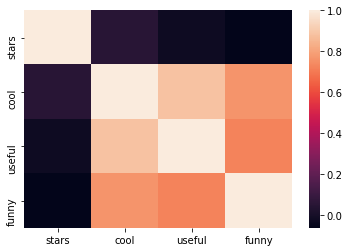

In [19]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

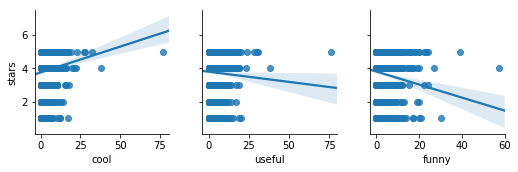

In [28]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.pairplot(df, x_vars=['cool', 'useful', 'funny'], y_vars='stars', kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [33]:
x = df[['cool', 'useful', 'funny']]
print x.head(1)
y = df.stars

   cool  useful  funny
0     2       5      0


## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
model.intercept_, model.coef_

(3.8398947927830829, array([ 0.27435947, -0.14745239, -0.13567449]))

In [40]:
#If you have 0 on cool, useful, or funny people generally give you a 3.8 stars. 
#For every cool you go up about 0.27 but the more useful or funny the place is voted, the lower the food rating.
#So.....shut up and let the food and ambiance wow customers.

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

/Users/zoliver_laptop/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
# define a function that accepts a list of features and returns testing RMSE
def rmse(feature_list):
    x = df[feature_list]
    y = df.stars
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
    model = LinearRegression()
    model.fit(x_train, y_train)                  # fit the model using whole set
    y_predict = model.predict(x_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [54]:
# calculate RMSE with all three features
print 'All 3: ', rmse(['cool','useful','funny'])

All 3:  1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [55]:
print 'cool: ', rmse(['cool'])
print 'useful: ', rmse(['useful'])
print 'funny: ', rmse(['funny'])
print 'cool,useful: ', rmse(['cool','useful'])
print 'useful,funny: ', rmse(['useful','funny'])
print 'cool,funny: ', rmse(['cool','funny'])

cool:  1.20049049928
useful:  1.20143488625
funny:  1.20043591364
cool,useful:  1.18537944234
useful,funny:  1.20070113589
cool,funny:  1.1851949299


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [64]:
# new feature: 
df['review_length'] = df.text.apply(lambda x: len(x))
df['dateformat'] = pd.to_datetime(df['date'])
df['day'] = df.dateformat.apply(lambda x: x.day)
df['month'] = df.dateformat.apply(lambda x: x.month)
df['year'] = df.dateformat.apply(lambda x: x.year)
print df.head(1)

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   

                  user_id  cool  useful  funny  review_length dateformat  day  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0            889 2011-01-26   26   

   month  year  
0      1  2011  


In [ ]:
# new features: 


In [65]:
# add new features to the model and calculate RMSE
print 'All + len + dateformat: ', rmse(['cool','useful','funny','review_length','dateformat'])
print 'All + len + day: ', rmse(['cool','useful','funny','review_length','day'])
print 'All + len + month: ', rmse(['cool','useful','funny','review_length','month'])
print 'All + len + year: ', rmse(['cool','useful','funny','review_length','year'])

All + len + dateformat: 

TypeError: float() argument must be a string or a number

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.